In [10]:
import numpy as np
import scipy as sp
from scipy.stats import norm
import matplotlib.pyplot as plt
from tqdm import tqdm
M=1 #Model 1

In [11]:
#def draw_samp(n,theta,sigma,seed=16):
#    np.random.seed(seed)
#    ind_clus=np.diag(np.sign(np.random.uniform(low=0.0, high=1.0, size=n)-0.5))
#    samp=np.random.normal(ind_clus@np.repeat(theta,n,axis=0),np.repeat(sigma,n,axis=0))
#    return samp

In [12]:
def draw_samp(n,theta,sigma,seed=1):
    np.random.seed(seed)
    samp=np.random.normal(size=(n,np.size(theta)))
    return samp

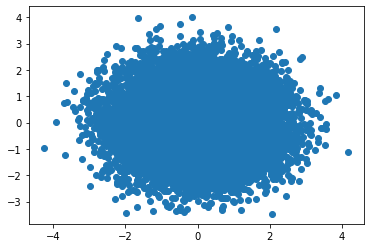

In [13]:
kkk=draw_samp(20000,np.array([[3,2]]),np.array([[1,1]]))
#kkk=draw_samp(2000,np.array([[0,0]]),np.array([[1,1]]))
plt.scatter(kkk[:,0],kkk[:,1])

In [14]:
def normal_pdfs(samp,theta,sigma):

    d=np.size(theta)
    n=np.shape(samp)[0]
    theta=np.repeat(theta,n,axis=0)
    sigma=np.repeat(sigma,n,axis=0)
    log_pdf_pos=np.sum(norm.logpdf(samp,theta,sigma),axis=1)
    log_pdf_neg=np.sum(norm.logpdf(samp,-theta,sigma),axis=1)
    pdf_pos=np.reshape(np.exp(log_pdf_pos),(n,1))
    pdf_neg=np.reshape(np.exp(log_pdf_neg),(n,1))

    
    return pdf_pos, pdf_neg


def L(samp,theta,sigma,pdf_pos,pdf_neg):
    """
    L_value
    theta:mean
    nu: precision
    """
    #samp=draw_samp(100,theta_star,sigma_star)
    d=np.size(theta)
    n=np.shape(samp)[0]
    theta=np.repeat(theta,n,axis=0)
    sigma=np.repeat(sigma,n,axis=0)
    
    L_val=np.mean(np.log(0.5*pdf_pos+0.5*pdf_neg))
    
    return L_val



def dL_theta(samp,theta,sigma,pdf_pos,pdf_neg):
    """
    derivative of theta
    theta:mean
    nu: precision
    """
    #samp=draw_samp(100,theta_star,sigma_star)
    d=np.size(theta)
    n=np.shape(samp)[0]
    theta=np.repeat(theta,n,axis=0)
    sigma=np.repeat(sigma,n,axis=0)
    
    nomi=0.5*pdf_pos*(-(theta-samp)/(sigma**2))+0.5*pdf_neg*(-(theta+samp)/(sigma**2))
    deno1=(0.5*pdf_pos+0.5*pdf_neg)
    #deno2=np.reshape(deno1,(n,1))
    deno=np.repeat(deno1,d,axis=1)
    res=np.mean(nomi/deno,axis=0)
    
    return res

def dL_sigma_theta(samp,theta,sigma,pdf_pos,pdf_neg):
    """
    dL_sigma*dsigma_theta
    theta:mean
    nu: precision
    """
    #samp=draw_samp(100,theta_star,sigma_star)
    d=np.size(theta)
    n=np.shape(samp)[0]
    theta=np.repeat(theta,n,axis=0)
    sigma=np.repeat(sigma,n,axis=0)
    
    nomi_pos=-pdf_pos/sigma+pdf_pos*(samp-theta)**2/(sigma**3)
    nomi_neg=-pdf_neg/sigma+pdf_neg*(samp+theta)**2/(sigma**3)
    nomi=0.5*nomi_pos+0.5*nomi_neg
    deno1=(0.5*pdf_pos+0.5*pdf_neg)
    deno=np.repeat(deno1,d,axis=1)
    
    dL_sigma=np.sum(nomi/deno,axis=1)
    dL_sigma=np.reshape(dL_sigma,(n,1))
    
    dsigma_theta=-theta/(d*sigma)
    
    res=np.mean(dL_sigma*dsigma_theta,axis=0)

    
    return res




In [15]:
def adaEGD(iteration,theta0,theta_star,sigma_star,eta,beta,samp):
    
    theta=theta0
    theta_hat=theta
    d=np.size(theta0)
    
    samp_square_average=np.mean(samp**2)
    
    sigma=np.sqrt(samp_square_average-np.mean(theta**2))
    sigma=np.repeat(sigma,d).reshape((1,d))
    
    DIFF_theta=np.array([])
    DIFF_sigma=np.array([])
    
    pdf_pos,pdf_neg=normal_pdfs(samp,theta,sigma)
    L1=L(samp,theta,sigma,pdf_pos,pdf_neg)
    optimal_iter=-1
    
    
    
    for i in tqdm(range(iteration)):
        
        DIFF_theta=np.append(DIFF_theta,np.linalg.norm(theta-theta_star))
        #DIFF_theta=np.append(DIFF_theta,np.linalg.norm(theta-theta_hat))
        DIFF_sigma=np.append(DIFF_sigma,np.abs(sigma[0]-sigma_star[0]))
        
        
        pdf_pos,pdf_neg=normal_pdfs(samp,theta,sigma)
        DLN_theta=dL_theta(samp,theta,sigma,pdf_pos,pdf_neg)+dL_sigma_theta(samp,theta,sigma,pdf_pos,pdf_neg)
    
        theta=theta+eta/(beta**i)*DLN_theta
        sigma=np.sqrt(samp_square_average-np.mean(theta**2))
        sigma=np.repeat(sigma,d).reshape((1,d))
        
        L2=L(samp,theta,sigma,pdf_pos,pdf_neg)
        
        if L2>L1:
            theta_hat=theta
            L1=L2
            optimal_iter=i
        
    return DIFF_theta, DIFF_sigma,theta_hat,optimal_iter

In [21]:
theta_star=np.array([[0,0,0]])
sigma_star=np.array([[1,1,1]])

theta_star=np.array([[0,0]])
sigma_star=np.array([[1,1]])

theta_star=np.array([[0]])
sigma_star=np.array([[1]])

 76%|███████▌  | 4558/6000 [25:02<07:48,  3.08it/s]/Users/cuifuheng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1783: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
/Users/cuifuheng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/Users/cuifuheng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/Users/cuifuheng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1784: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)
100%|██████████| 6000/6000 [32:31<00:00,  3.08it/s]


Text(0, 0.5, 'log ||theta-theta*||')

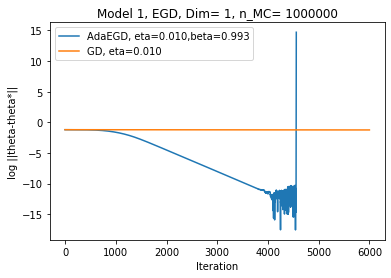

In [22]:
iteration=6000

theta0=np.array([[0.1,0.1,0.1]]) #initial
theta0=np.array([[0.1,0.1]]) #initial
theta0=np.array([[0.3]]) #initial
beta=0.993
eta=0.01
d=np.size(theta0)

n_samp=1000000

seed=2
samp=draw_samp(n_samp,theta_star,sigma_star,seed)

DIFF_adagrad_theta,DIFF_adagrad_sigma,theta_hat,optimal_iter=adaEGD(iteration,theta0,theta_star,sigma_star,eta,beta,samp)
DIFF_GD_theta,DIFF_GD_sigma,theta_hat_GD,optimal_iter_GD=adaEGD(iteration,theta0,theta_star,sigma_star,eta,1,samp)
plt.plot(range(iteration), np.log(DIFF_adagrad_theta), label='AdaEGD, eta={eta:.3f},beta={beta:.3f}'.format(eta=eta,beta=beta))
plt.plot(range(iteration), np.log(DIFF_GD_theta), label='GD, eta={eta:.3f}'.format(eta=eta))
plt.legend()
plt.title("Model{m: d}, EGD, Dim={dim: d}, n_MC={N_samp: d}".format(m=M,dim=d,N_samp=n_samp))
plt.xlabel('Iteration')
plt.ylabel('log ||theta-theta*||')

In [23]:
gmm_data = {'DIFF_adagrad_theta':DIFF_adagrad_theta,
            'DIFF_adagrad_sigma':DIFF_adagrad_sigma,
            'theta_hat':theta_hat,
            'optimal_iter':optimal_iter,
            'DIFF_GD_theta':DIFF_GD_theta,
            'DIFF_GD_sigma':DIFF_GD_sigma,
            'theta_hat_GD':theta_hat_GD,
            'optimal_iter_GD':optimal_iter_GD,
            'theta0':theta0,
            'beta':beta,
            'eta':eta,
            'n_samp':n_samp,
            'd':d,
            'theta_star':theta_star,
            'sigma_star':sigma_star,
            'M':M,
            "iteration":iteration}
np.save('./sim_data/M1_iter{}_seed{}_dim{}'.format(iteration,seed,d),gmm_data)